# Time Series clustering notebook

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from data.param_data_loader2 import ParamDL2
dataset = ParamDL2()



Processing Congestion
Processed 24 Congestions
Saved Congestion File
Processing Car Following
Processed 60 cf_events
Saved Car Following File
Datast Loaded. Preview of dataset: 
   driver  trip  congestion  cf_idx  type    time  gmm_n_cluster  \
0       1    53           0       0     0  1698.8              4   
1       1    53           0       0     0  1698.9              4   
2       1    53           0       0     0  1699.0              4   
3       1    53           0       0     0  1699.1              4   
4       1    53           0       0     0  1699.2              4   

   rank_0_cluster  rank_1_cluster  rank_2_cluster  ...  pedalChange  VL_theta  \
0               2               3               1  ...          0.0  0.137128   
1               2               3               1  ...          0.0  0.137128   
2               2               3               1  ...          0.0  0.138907   
3               2               3               1  ...          0.0  0.140121   
4       

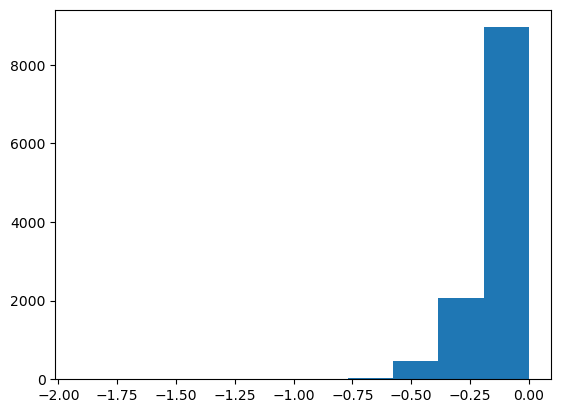

-0.13508159902723274
192


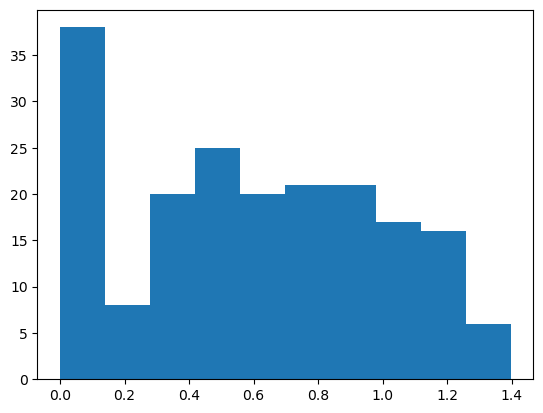

1.3972
192


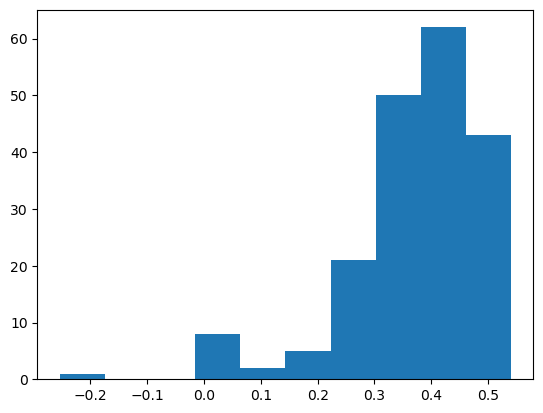

1.3972


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

coasting_axs = []
for cf in dataset.cf_events:
    coasting_criterion = pd.Series((cf["accelpedal"] == 0) & (cf["brakepedal"] == 0) & (cf["calibratedAx"] < 0))
    coasting_axs.append(cf.loc[coasting_criterion, "calibratedAx"])
coasting_ax = pd.concat(coasting_axs)
plt.hist(coasting_ax)
plt.show()
plt.close()

coasting_mean_decel = coasting_ax.mean()
print(coasting_mean_decel)

creep_vs = []
for cf in dataset.cf_events:
    creep_vs.append(cf.loc[cf["pedalMode"] == 2, 'speed'])
creep_speeds = pd.concat(creep_vs)
print(len(creep_speeds))
plt.hist(creep_speeds)
plt.show()
plt.close()

print(creep_speeds.max())

creep_axs = []
for cf in dataset.cf_events:
    creep_axs.append(cf.loc[cf["pedalMode"] == 2, 'calibratedAx'])
creep_axss = pd.concat(creep_axs)
print(len(creep_axss))
plt.hist(creep_axss)
plt.show()
plt.close()
